In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("people.txt" , delimiter=",")
print(arr.head())


   age agegroup  height   status  yearsmarried
0   21    adult     6.0   single            -1
1    2    child     3.0  married             0
2   18    adult     5.7  married            20
3  221  elderly     5.0  widowed             2
4   34    child    -7.0  married             3


In [52]:
#age in range 0 - 150
def check_age(data):
    return data['age'].isin(range(0,151))               

In [53]:
# AGE > YEARS MARRIED
def age_greater_years_married(data):
    return data['age'] > data['yearsmarried']

In [54]:
# check age and age group
def ch_age_group(data):
    ch = ((data['age'] < 18) & (data['agegroup'] == 'child') ) | ( (data['age'].isin(range(18,66))) & (data['agegroup'] == 'adult') ) | ( (data['age'] > 65) & (data['agegroup'] == 'elderly'))
    return ch

In [55]:
# check status
def ch_status(data):
     return data['status'].isin(['single', 'married', 'widowed'])

In [56]:
ruleset = {0 : check_age, 1 : age_greater_years_married, 2 : ch_status, 3 : ch_age_group }
ch_rule = np.empty(len(ruleset))


for i in ruleset:
    ch_rule[i] = len(ruleset[i](data)) - ruleset[i](data).value_counts().at[True]
    print(f'No. of times rule {i} is broken: ', int(ch_rule[i]))
    

No. of times rule 0 is broken:  1
No. of times rule 1 is broken:  1
No. of times rule 2 is broken:  0
No. of times rule 3 is broken:  1


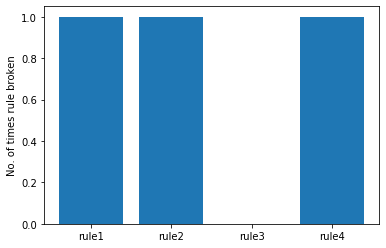

In [57]:
rule = np.array(['rule1', 'rule2', 'rule3', 'rule4'])
plt.bar(rule, ch_rule)
plt.ylabel('No. of times rule broken')
plt.show()